### Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [19]:
import yfinance as yf
import pandas as pd
tesla = yf.Ticker("TSLA")
tesla_share_price_data = tesla.history(period="max")
tesla_share_price_data.reset_index(inplace=True)
tesla_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


### Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [20]:
from bs4 import BeautifulSoup
import requests 
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np

In [21]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
data  = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')

In [22]:

tesla_data = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.select('div.col-xs-6:nth-child(2) table.historical_data_table tbody tr'):
    col = row.find_all('td')
    year = col[0].text.strip()
    revenue_text = re.sub('[^\d]', '', col[1].text.strip())
    if revenue_text:
        revenue = int(revenue_text)
        tesla_data = tesla_data.append({'Date': year, 'Revenue': revenue}, ignore_index=True)
    else:
        tesla_data = tesla_data.append({'Date': year, 'Revenue': np.nan}, ignore_index=True)
        
tesla_data.tail()

,Date,Revenue
49,2010-06-30,28
50,2010-03-31,21
51,2009-12-31,NaN
52,2009-09-30,46
53,2009-06-30,27


### Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points


In [23]:
import yfinance as yf
import pandas as pd
GameStop = yf.Ticker("GME")
GameStop_share_price_data = GameStop.history(period="max")
GameStop_share_price_data.reset_index(inplace=True)
GameStop_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [32]:
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
data2  = requests.get(url2).text
soup2 = BeautifulSoup(data2, 'html.parser')

In [33]:
gme_data = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.select('div.col-xs-6:nth-child(2) table.historical_data_table tbody tr'):
    col = row.find_all('td')
    year = col[0].text.strip()
    revenue_text = re.sub('[^\d]', '', col[1].text.strip())
    if revenue_text:
        revenue = int(revenue_text)
        gme_data = gme_data.append({'Date': year, 'Revenue': revenue}, ignore_index=True)
    else:
        gme_data = gme_data.append({'Date': year, 'Revenue': np.nan}, ignore_index=True)
        
gme_data.tail()

,Date,Revenue
49,2010-06-30,28
50,2010-03-31,21
51,2009-12-31,NaN
52,2009-09-30,46
53,2009-06-30,27


### Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

In [26]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
stock = 'Tesla Share Price & Revenue over time'

In [27]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()


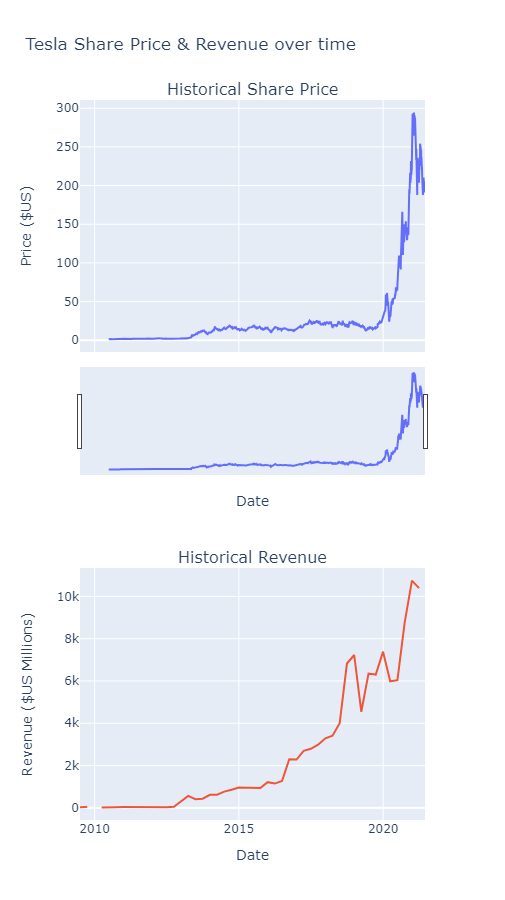

In [28]:
make_graph(tesla_share_price_data, tesla_data, stock)

### Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

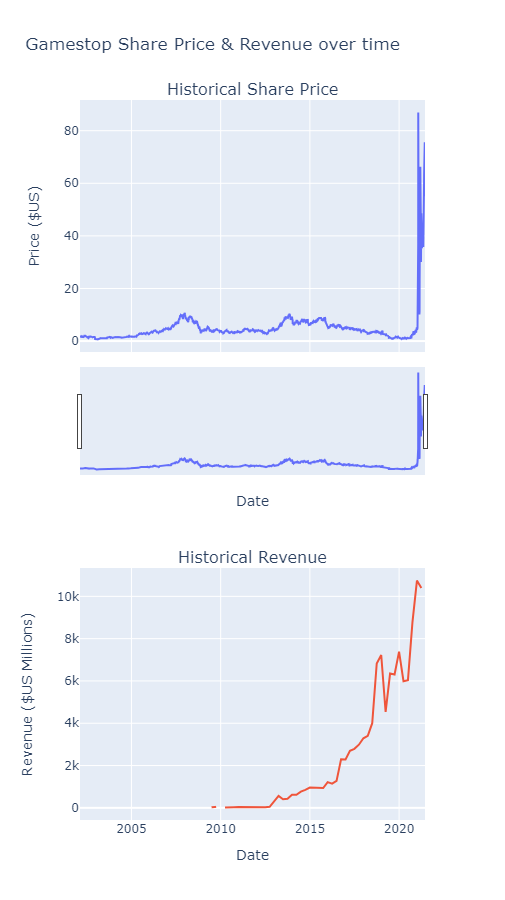

In [29]:
stock = 'Gamestop Share Price & Revenue over time'
make_graph(GameStop_share_price_data, gme_data, stock)

### thanks for your time , good luck on your course fellow pier reviewers